## Distribution of Divergent Fungal Actin (DFA) in fungal orders

**Notebook summary**
This Jupyter Notebook:
- analyses and visualizes the distribution of DFA in Fungi at the order level
- is associated with Step 2 of the Pub approach: Defining the ‘working set of species’
- provides the codes for the Pub Figures 4B

**Context/Goal reminder**
We have been able to determine our working set of 853 fungal species. For each of these fungal species we are able to detremine their DFA presence/absence status. To have a better understanding of the distribution of DFA in the Fungi kingdom, we study the distribution of DFA at the fungi order level by analysing and visualizing what fraction of each order possess DFA (ie the number of species that possess DFA in an order divided by the total number of species in this order)

**Notebook purpose**
In this notebook, we determine the DFA status of all the species in the working set and then study distribution of DFA at the fungi order level. We eventually visualize this information onto a order level phylogenetic tree.

---

### Setup path and environment

In [1]:
setwd('..')

library(ggplot2)
library(dplyr)
library(ggtree)
library(ape)
library(ggtreeExtra)
library(ggnewscale)



Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidyt

### Analysis

In [2]:
## Import data
    # We import data for the working set and data for the extended cluster

all_set=read.csv('results/step2/uniprot_all_wset_taxo.csv')[,-1]  # working set

DFA_set=read.csv('data/step1/DFA_clust_taxo_manually_corrected.csv')[,-1] # DFA extented set
DFA_set_f=subset(DFA_set,DFA_set$Kingdom=='Fungi')


In [3]:
## Adding DFA information status to the working set
    # Any species in the extended set possess DFA, while species in the working set but not in the extented set don't possess DFA

DFA_fungi_species=data.frame('Organism_uniprot'=c(unique(as.character(DFA_set_f$Organism))),
                             'DFA'='Yes') 



In [4]:
all_set_ch<- all_set %>%
  mutate_all(~as.character(.))

DFA_fungi_species_ch<- DFA_fungi_species %>%
  mutate_all(~as.character(.))

all_set_w_DFA=left_join(all_set_ch,DFA_fungi_species_ch,by='Organism_uniprot') 

all_set_w_DFA$DFA[is.na(all_set_w_DFA$DFA)]<-'No'

head(all_set_w_DFA,15)

,Organism_uniprot,n_prot,species_name,kingdom,phylum,class,order,family,genus,DFA
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,[Candida] intermedia,10617,[Candida] intermedia,Fungi,Ascomycota,Saccharomycetes,Saccharomycetales,Metschnikowiaceae,Candida,No
2,[Torrubiella] hemipterigena,11065,[Torrubiella] hemipterigena,Fungi,Ascomycota,Sordariomycetes,Hypocreales,Clavicipitaceae,Torrubiella,Yes
3,Aaosphaeria arxii CBS 175.79,13815,Aaosphaeria arxii CBS 175.79,Fungi,Ascomycota,Dothideomycetes,Pleosporales,NA,Aaosphaeria,No
4,Absidia glauca (Pin mould),14217,Absidia glauca,Fungi,Mucoromycota,Mucoromycetes,Mucorales,Cunninghamellaceae,Absidia,Yes
5,Absidia repens,14353,Absidia repens,Fungi,Mucoromycota,Mucoromycetes,Mucorales,Cunninghamellaceae,Absidia,Yes
6,Acaromyces ingoldii,7585,Acaromyces ingoldii,Fungi,Basidiomycota,Exobasidiomycetes,Exobasidiales,Cryptobasidiaceae,Acaromyces,No
7,Acidomyces richmondensis BFW,10856,Acidomyces richmondensis BFW,Fungi,Ascomycota,Dothideomycetes,Mycosphaerellales,Teratosphaeriaceae,Acidomyces,No
8,Agaricus bisporus var. burnettii (strain JB137-S8 / ATCC MYA-4627 / FGSC 10392) (White button mushroom),10948,Agaricus bisporus var. burnettii,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Agaricaceae,Agaricus,No
9,Ajellomyces capsulatus (strain G186AR / H82 / ATCC MYA-2454 / RMSCC 2432) (Darling's disease fungus) (Histoplasma capsulatum),9199,Ajellomyces capsulatus,Fungi,Ascomycota,Eurotiomycetes,Onygenales,Ajellomycetaceae,Ajellomyces,Yes


In [5]:
## Calculate fraction of DFA at the order level
    # for each fungal order we calulate the order DFA fraction as the number of species with DFA in the order divided by the number of species in the order

Levels=na.omit(c(unique(all_set_w_DFA$order)))

df_order=data.frame()
for (i in 1:length(Levels)){
  dat_temp=subset(all_set_w_DFA, all_set_w_DFA$order==Levels[i])
  n=dim(dat_temp)[1]
  phy=unique(dat_temp[,'phylum'])
  DFA=sum(dat_temp$DFA=="Yes")
  
  df_temp=data.frame('Order'=Levels[i],
                     'Order_size'=n,
                     'Phylum'=phy,
                     'DFA_yes'=DFA,
                     'DFA_no'=(n-DFA),
                     'DFA_frac'=DFA/n)
  
  df_order=rbind(df_order, df_temp)
  
}

head(df_order,10)


,Order,Order_size,Phylum,DFA_yes,DFA_no,DFA_frac
,<chr>,<int>,<chr>,<int>,<int>,<dbl>
1,Saccharomycetales,18,Ascomycota,8,10,0.44444444
2,Hypocreales,105,Ascomycota,1,104,0.00952381
3,Pleosporales,46,Ascomycota,29,17,0.63043478
4,Mucorales,18,Mucoromycota,11,7,0.61111111
5,Exobasidiales,2,Basidiomycota,0,2,0.00000000
6,Mycosphaerellales,19,Ascomycota,14,5,0.73684211
7,Agaricales,35,Basidiomycota,26,9,0.74285714
8,Onygenales,41,Ascomycota,19,22,0.46341463
9,Blastocladiales,2,Blastocladiomycota,2,0,1.00000000


In [ ]:
## Save order information table
write.csv(all_set_w_DFA, 'results/step2/working_set_w_DFA.csv')
write.csv(df_order, 'results/step2/order_information_DFA_fraction.csv')

### Visualization - Figure 4B

In [6]:
## Import newick file of fungal order tree (from Timetree)

tree_order=read.tree('data/step2/Fungi_order_timetree.nwk')

In [7]:
## Define the set of orders present in our dataset and trim the tree

order_uni=c(unique(all_set_w_DFA$order))  # orders present in our working set

inter_order=intersect(tree_order$tip.label,order_uni) #look at intersection with tree tips

tree_order_trimmed=keep.tip(tree_order,inter_order) # keep only the orders of interest from the tree

In [8]:
## Reformat data to map onto the tree

tree_data=subset(df_order, df_order$Order%in%inter_order)

tree_data$Phylum=factor(tree_data$Phylum,levels=c('Ascomycota','Basidiomycota','Mucoromycota','Zoopagomycota',
                                                  'Blastocladiomycota','Chytridiomycota'))

colnames(tree_data)=c('tip.label',colnames(tree_data[,2:6]))

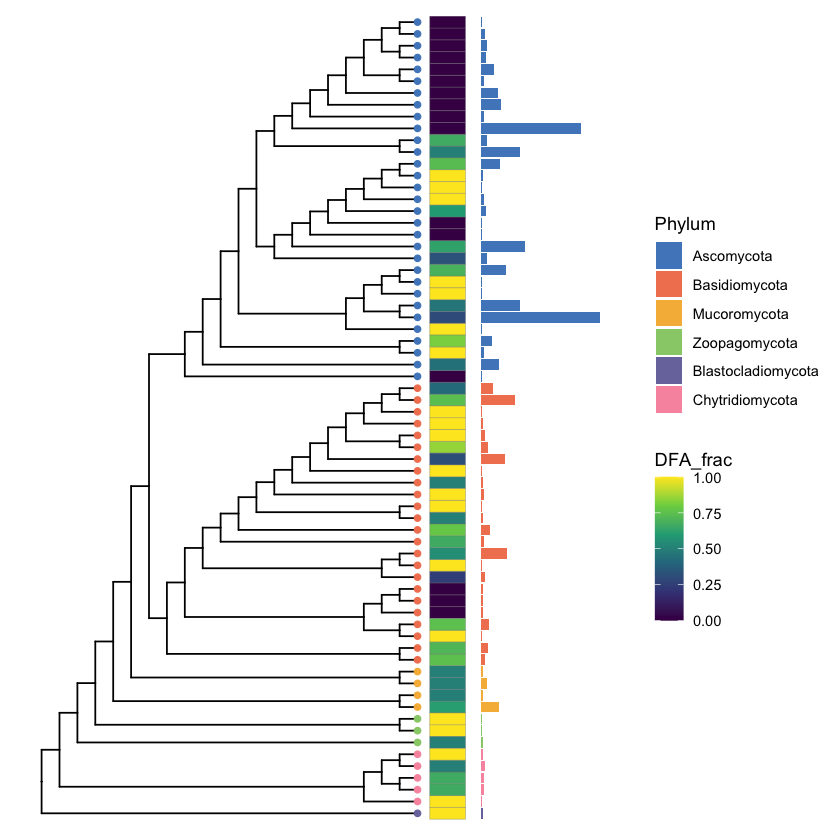

In [9]:
## Tree - Figure 4B

    # Defining color palette

accent_ordered <- c('#5088C5', '#F28360', '#F7B846', '#97CD78',
                    '#7A77AB', '#F898AE', '#3B9886', '#C85152',
                    '#73B5E3', '#BAB0A8', '#8A99AD', '#FFB984')

    # Base tree

pt=ggtree(tree_order_trimmed, branch.length="none")  %<+% tree_data  

    # Adding phylum information as colored tip
pt1=pt + geom_tippoint(aes(color=Phylum)) +
  scale_color_manual(values=c((accent_ordered))) 

    # Adding the heatmap for the DFA fraction

pt2 = pt1 + new_scale_fill() +
  geom_fruit(geom=geom_tile,
             mapping=aes(y=tip.label, fill=DFA_frac, width=2),
             color = "grey50", offset = 0.08) +
  scale_fill_viridis_c(direction=1, option='D')

    # Adding order size information colored by Phylum

pt3=pt2 + new_scale_fill()+ 
  geom_fruit(geom=geom_bar,
             mapping=aes(y=tip.label,x=Order_size, fill=Phylum),
             pwidth=0.38, 
             orientation="y", 
             stat="identity",
             offset=0.09)+
  scale_fill_manual(values=c((accent_ordered)))

pt3


In [11]:
sessionInfo()

R version 4.2.1 (2022-06-23)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur ... 10.16

Matrix products: default
BLAS/LAPACK: /Users/manonmorin/miniconda3/envs/R_good_env/lib/libopenblasp-r0.3.24.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggnewscale_0.4.9  ggtreeExtra_1.8.0 ape_5.7-1         ggtree_3.6.0     
[5] dplyr_1.1.4       ggplot2_3.4.4    

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-10      treeio_1.22.0      tidyselect_1.2.0   repr_1.1.6        
 [5] purrr_1.0.2        lattice_0.22-5     ggfun_0.1.3        colorspace_2.1-0  
 [9] vctrs_0.6.4        generics_0.1.3     viridisLite_0.4.2  htmltools_0.5.7   
[13] base64enc_0.1-3    utf8_1.2.4         gridGraphics_0.5-1 rlang_1.1.2       
[17] pillar_1.9.0       glue_1.6.2         withr_2.5.2        uuid_1.1-1        
[21] li